## Neural Network

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping




In [17]:
data=pd.read_csv("https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/9a7d477bbed852e752101fe85ac928200ae7ebd5/data/aapl_1d_train.csv")
data.dropna(inplace=True)

In [18]:
data=data["Close"].values.reshape(-1, 1)

In [19]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [21]:
# Set the number of time steps for LSTM
time_steps = 6  # Number of previous days to use for prediction

# Create input features and labels
X, y = create_dataset(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input features for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:

# Build the LSTM model
model = Sequential([
    LSTM(units=560,return_sequences=True,input_shape=(X_train.shape[1], 1)),
    LSTM(units=260),
    Dense(units=1,activation="relu")
])



c:\Users\esteb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.losses import mean_squared_error


# Definir una función personalizada para calcular la raíz del error cuadrático medio
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Compilar el modelo con la función de pérdida personalizada
model.compile(optimizer='adam', loss=mean_squared_error, metrics=['mean_squared_error'])


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [25]:

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 1.4105e-04 - mean_squared_error: 1.4106e-04 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 1.3712e-04 - mean_squared_error: 1.3709e-04 - val_loss: 0.0021 - val_mean_squared_error: 0.0022
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 2.0409e-04 - mean_squared_error: 2.0410e-04 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.7206e-04 - mean_squared_error: 1.7207e-04 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 1.8233e-04 - mean_squared_error: 1.8233e-04 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 2.03

In [26]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [27]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

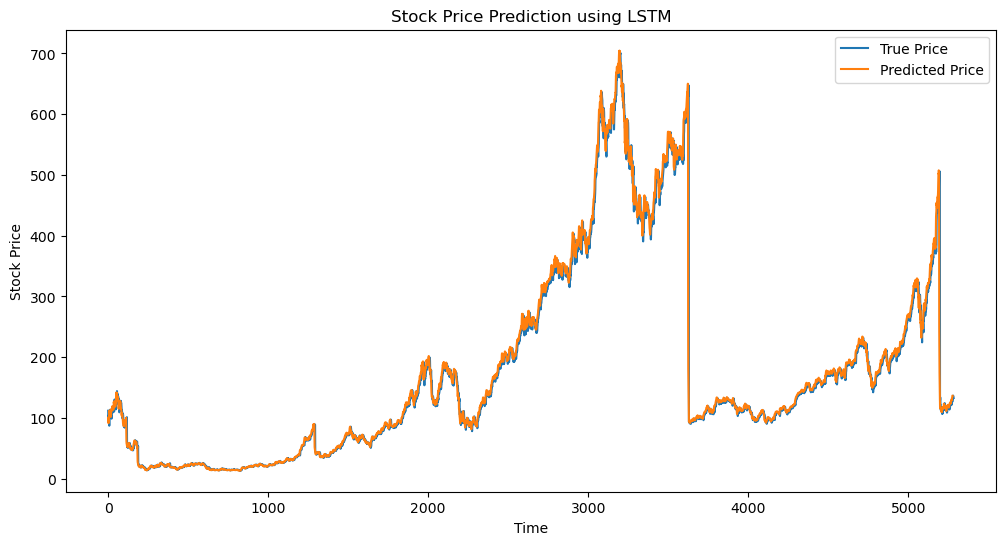

In [28]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='True Price')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [29]:
# Guardar el modelo con pickle
import pickle
filename = 'modelo_LSTM.sav'
pickle.dump(model, open(filename, 'wb'))


AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

In [30]:
data_test=pd.read_csv('https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/9a7d477bbed852e752101fe85ac928200ae7ebd5/data/aapl_1d_test.csv')
data_test.dropna(inplace=True)

In [31]:
data_test=data_test["Close"].values.reshape(-1, 1)

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_test)

In [33]:
# Set the number of time steps for LSTM
time_steps = 30  # Number of previous days to use for prediction

# Create input features and labels
X_test, y_test = create_dataset(scaled_data, time_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
test_predictions = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [35]:
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

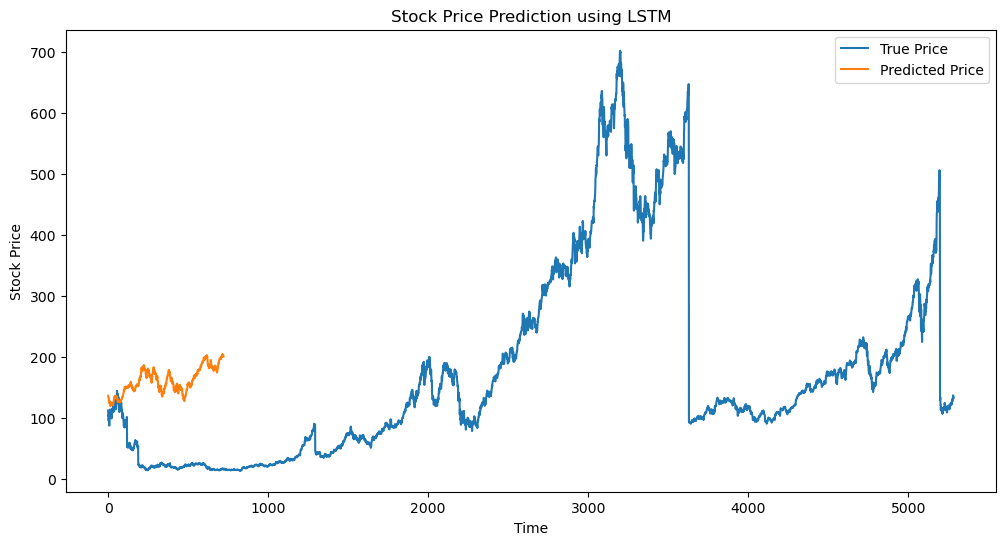

In [36]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='True Price')
plt.plot(test_predictions, label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [37]:
from tensorflow.keras import models
# Save the Keras model
models.save_model(model, 'model.h5')



In [38]:
# Guardar el modelo con pickle
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [39]:
# Cargar el modelo con pickle y guardarlo en una variable
with open('scaler.pkl', 'rb') as f:
    model = pickle.load(f)

In [40]:
# Initialize the portfolio
portfolio_value = 100000  # Initial portfolio value
cash = portfolio_value
stock = 0
history = []  # To keep track of buy/sell/hold actions

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import pickle

# Supongamos que 'data_train' y 'data_test' son tus datos de entrenamiento y prueba respectivamente

# Entrenar un nuevo modelo
X_train = np.arange(len(data)).reshape(-1, 1)
y_train = data.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

# Guardar el modelo entrenado con pickle
with open('modelo_LSTM.sav', 'wb') as f:
    pickle.dump(model, f)

# Cargar el escalador previamente guardado con pickle
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Definir otras variables necesarias para el backtesting
time_steps = 10  # Definir el número de pasos de tiempo
cash = 1000000  # Definir el efectivo inicial
stock = 0  # Definir el número de acciones inicial
portfolio_value = cash  # Definir el valor del portafolio inicial
history = []  # Crear una lista para almacenar el historial de acciones
take_profit = 1.05  # Definir el take profit
stop_loss = 0.97  # Definir el stop loss
buying_price = 0  # Inicializar el precio de compra

# Realizar predicciones y ejecutar el backtesting
for i in range(len(data_test) - time_steps):
    # Preparar los datos de prueba y escalarlos
    X_test_reshaped = data_test[i:i+time_steps].reshape(-1, 1)
    X_test_scaled = scaler.transform(X_test_reshaped)
    
    # Predecir el precio del siguiente día
    predicted_price_scaled = model.predict(np.array([[i+time_steps]]))  # Use the same shape as during training
    predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))[0][0]
    
    # Obtener el precio actual del siguiente día
    actual_price = data_test[i+time_steps]
    # Decidir comprar, vender o mantener
    if predicted_price > actual_price:  # Si el modelo predice que el precio subirá
        if cash > 0:
            # Comprar solo el 5% del valor del portafolio
            buy_value = min(cash, portfolio_value * 0.01)
            stock += buy_value / actual_price
            cash -= buy_value
            action = 'Buy'
            buying_price = actual_price
    elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # Si el modelo predice que el precio bajará o se alcanza el take profit o stop loss
        if stock > 0:
            # Vender solo el 5% del valor del portafolio
            sell_value = min(stock * actual_price, portfolio_value * 0.01)
            stock -= sell_value / actual_price
            cash += sell_value
            action = 'Sell'
    else:
        action = 'Hold'
    
    # Calcular el valor del portafolio
    portfolio_value = cash + stock * actual_price
    
    # Guardar la acción en el historial
    history.append({
        'Day': i,
        'Action': action,
        'Cash': cash,
        'Stock': stock,
        'Portfolio Value': portfolio_value
    })

# Convertir el historial en un DataFrame
df_history = pd.DataFrame(history)

In [42]:
df_history

,Day,Action,Cash,Stock,Portfolio Value
0,0,Buy,990000.0,[7797.559868441347],[1000000.0]
1,1,Buy,[0.0],[7797.559868441347],[1000328.5613705703]
2,2,Buy,[0.0],[7797.559868441347],[1001073.772587972]
3,3,Buy,[0.0],[7797.559868441347],[1001573.2942365706]
4,4,Buy,[0.0],[7797.559868441347],[1002724.5933856912]
...,...,...,...,...,...
738,738,Buy,[0.0],[7797.559868441347],[1509607.5905302449]
739,739,Buy,[0.0],[7797.559868441347],[1505318.932602602]
740,740,Buy,[0.0],[7797.559868441347],[1506098.6885894462]
741,741,Buy,[0.0],[7797.559868441347],[1509451.639332876]


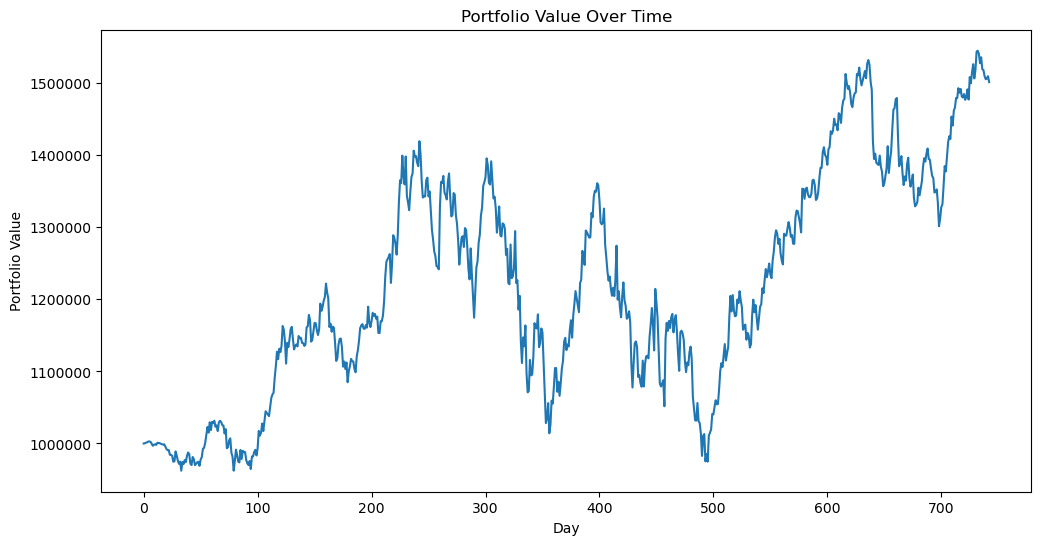

In [43]:
from matplotlib.ticker import FuncFormatter
# Define a function to format y values
def y_fmt(x, pos):
    return '{:0.0f}'.format(x)

# Create a formatter
formatter = FuncFormatter(y_fmt)

fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(formatter)
ax.plot(df_history['Day'], df_history['Portfolio Value'])
ax.set_title('Portfolio Value Over Time')
ax.set_xlabel('Day')
ax.set_ylabel('Portfolio Value')
plt.show()

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pickle

# Supongamos que 'data_train' y 'data_test' son tus datos de entrenamiento y prueba respectivamente

# Cargar el modelo previamente entrenado
model = load_model('model.h5')

# Cargar el escalador previamente guardado con pickle
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Definir otras variables necesarias para el backtesting
time_steps = 10  # Definir el número de pasos de tiempo
cash = 10000  # Definir el efectivo inicial
stock = 0  # Definir el número de acciones inicial
portfolio_value = cash  # Definir el valor del portafolio inicial
history = []  # Crear una lista para almacenar el historial de acciones
take_profit = 1.05  # Definir el take profit
stop_loss = 0.95  # Definir el stop loss
buying_price = 0  # Inicializar el precio de compra

# Realizar predicciones y ejecutar el backtesting
for i in range(len(data_test) - time_steps):
    # Preparar los datos de prueba y escalarlos
    X_test_reshaped = data_test[i:i+time_steps].reshape(-1, 1)
    X_test_scaled = scaler.transform(X_test_reshaped)
    
    # Predecir el precio del siguiente día
    predicted_price_scaled = model.predict(np.array([X_test_scaled]))  # Use the same shape as during training
    predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))[0][0]
    
    # Obtener el precio actual del siguiente día
    actual_price = data_test[i+time_steps]
    # Decidir comprar, vender o mantener
    if predicted_price > actual_price:  # Si el modelo predice que el precio subirá
        if cash > 0:
            # Comprar solo el 5% del valor del portafolio
            buy_value = min(cash, portfolio_value * 0.05)
            stock += buy_value / actual_price
            cash -= buy_value
            action = 'Buy'
            buying_price = actual_price
    elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # Si el modelo predice que el precio bajará o se alcanza el take profit o stop loss
        if stock > 0:
            # Vender solo el 5% del valor del portafolio
            sell_value = min(stock * actual_price, portfolio_value * 0.05)
            stock -= sell_value / actual_price
            cash += sell_value
            action = 'Sell'
    else:
        action = 'Hold'
    
    # Calcular el valor del portafolio
    portfolio_value = cash + stock * actual_price
    
    # Guardar la acción en el historial
    history.append({
        'Day': i,
        'Action': action,
        'Cash': cash,
        'Stock': stock,
        'Portfolio Value': portfolio_value
    })

# Convertir el historial en un DataFrame
df_history = pd.DataFrame(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [45]:
df_history

,Day,Action,Cash,Stock,Portfolio Value
0,0,Buy,9500.0,[71.40117317840951],[10000.0]
1,1,Sell,[0.0],[71.40117317840951],[10016.428068528514]
2,2,Sell,[0.0],[71.40117317840951],[10017.030294171762]
3,3,Sell,[0.0],[71.40117317840951],[10017.030294171762]
4,4,Sell,[0.0],[71.40117317840951],[10017.030294171762]
...,...,...,...,...,...
738,738,Buy,[0.0],[71.40117317840951],[13823.267127340081]
739,739,Buy,[0.0],[71.40117317840951],[13783.996482091956]
740,740,Buy,[0.0],[71.40117317840951],[13791.136599409796]
741,741,Buy,[0.0],[71.40117317840951],[13821.839103876513]


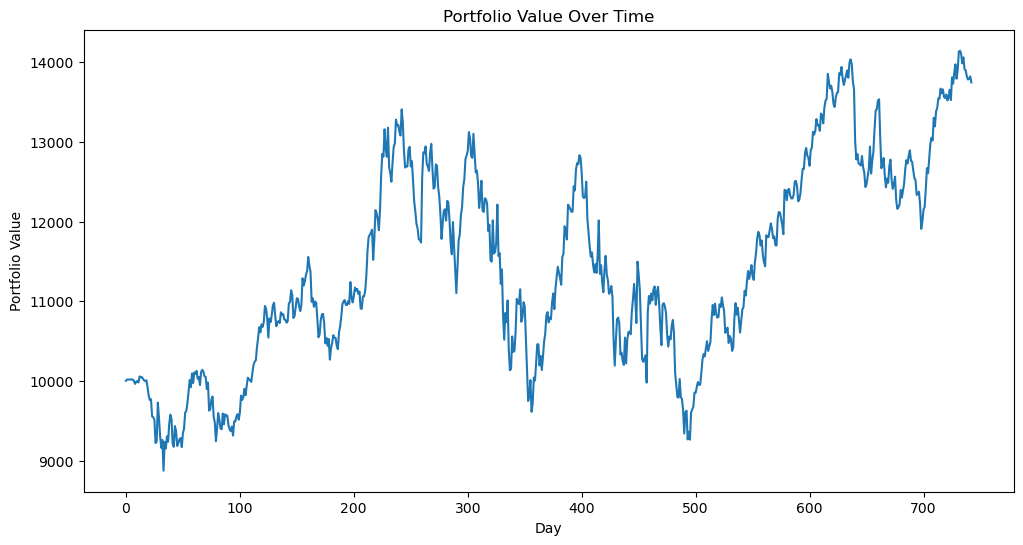

In [46]:
# Graficar el valor del portafolio a lo largo del tiempo
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Definir una función para formatear los valores de y
def y_fmt(x, pos):
    return '{:0.0f}'.format(x)

# Crear un formateador
formatter = FuncFormatter(y_fmt)

fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(formatter)
ax.plot(df_history['Day'], df_history['Portfolio Value'])
ax.set_title('Portfolio Value Over Time')
ax.set_xlabel('Day')
ax.set_ylabel('Portfolio Value')
plt.show()
